In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
!pip install seaborn==0.9.0

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.decomposition import PCA

sns.__version__

'0.9.0'

In [0]:
import pickle, os, numpy as np, pandas as pd

pickle_abundance_percent_difference = open("percentDiffAbundant.pickle","rb")
pickle_abundance_mean_change = open("meanACC.pickle","rb")
pickle_variance_mean_change = open("VarianceMeanChange.pickle","rb")
pickle_variance_std = open("rangeVCC.pickle","rb")
pickle_abundance_std = open("rangeACC.pickle","rb")
pickle_complex_to_root = open("complexToRootPathways.pickle","rb")
pickle_variance_percent_difference = open("VariancePercentDifferent.pickle","rb")

dict_abundance_percent_difference = pickle.load(pickle_abundance_percent_difference)
dict_abundance_mean_change = pickle.load(pickle_abundance_mean_change)
dict_variance_mean_change = pickle.load(pickle_variance_mean_change)
dict_variance_std = pickle.load(pickle_variance_std)
dict_abundance_std = pickle.load(pickle_abundance_std)
dict_complex_to_root = pickle.load(pickle_complex_to_root)
dict_variance_percent_difference = pickle.load(pickle_variance_percent_difference)


In [0]:
df = pd.DataFrame(list(dict_abundance_percent_difference.items()), columns=['Complex', 'percentDiffAbundant'])
#Map other values...
df['meanACC'] = df['Complex'].map(dict_abundance_mean_change)
df['rangeACC'] = df['Complex'].map(dict_abundance_std)
df['percentDiffVariant'] = df['Complex'].map(dict_variance_percent_difference)
df['meanVCC'] = df['Complex'].map(dict_variance_mean_change)
df['rangeVCC'] = df['Complex'].map(dict_variance_std)
# df['RootPathway'] = df['Complex'].map(dict_complex_to_root)
df = df.set_index("Complex", drop = False)


complexToProtein = pickle.load(open("BrentsComplexToProteins.pickle","rb"))
abundanceComplexToSize = pickle.load(open("abundanceComplexToSize.pickle","rb"))
complexToSize = pickle.load(open("complexToSize.pickle","rb"))



newDF = pd.DataFrame()

complexSize = []
for index, row in df.iterrows():
  if row[0] in list(complexToProtein.keys()):
    if abundanceComplexToSize[row[0]] != varianceComplexToSize[row[0]]:
      print(abundanceComplexToSize[row[0]])
      print(varianceComplexToSize[row[0]])
    complexSize.append(complexToSize[row[0]])
      

print(df.shape)
df["complexSize"] = complexSize
df = df[df["complexSize"] > 1]
print(df.shape)
# df
df = df.drop(columns=["complexSize","Complex"])
# nonNan = df.dropna()

(3698, 7)
(1256, 8)


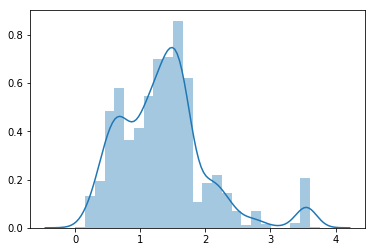

In [0]:
amc = sns.distplot(list(df["meanACC"]))

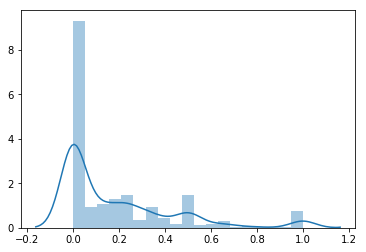

In [0]:
amc = sns.distplot(list(df["percentDiffAbundant"]))

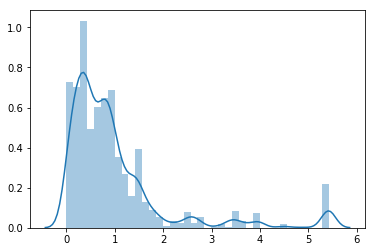

In [0]:
amc = sns.distplot(list(df["rangeACC"]))

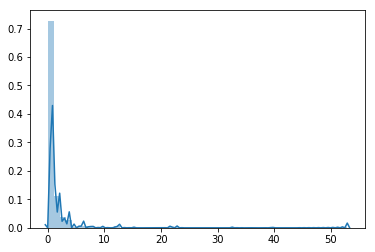

In [0]:
amc = sns.distplot(list(df["meanVCC"]))

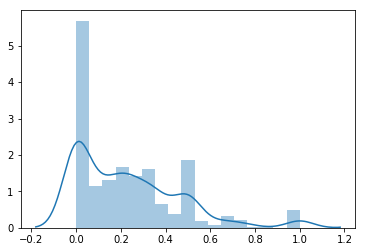

In [0]:
amc = sns.distplot(list(df["percentDiffVariant"]))

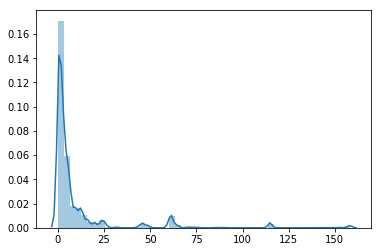

In [0]:
amc = sns.distplot(list(df["rangeVCC"]))